# Libraries

In [24]:
# install.packages('arules')
# install.packages('arulesViz')

Installing package into ‘/home/ggomarr/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘iterators’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘mvtnorm’, ‘robustbase’, ‘kernlab’, ‘trimcluster’, ‘gridExtra’, ‘bindr’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘zoo’, ‘foreach’, ‘fpc’, ‘viridis’, ‘gtools’, ‘gdata’, ‘yaml’, ‘assertthat’, ‘bindrcpp’, ‘glue’, ‘BH’, ‘plogr’, ‘shiny’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘irlba’, ‘pkgconfig’, ‘htmltools’, ‘htmlwidgets’, ‘viridisLite’, ‘base64enc’, ‘tidyr’, ‘hexbin’, ‘dplyr’, ‘crosstalk’, ‘purrr’, ‘data.table’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘DT’, ‘plotly’



In [25]:
library(caTools)
library(ggplot2)
library(repr)
options(repr.plot.width=8,repr.plot.height=4)
library(arules)
library(arulesViz)

Loading required package: grid


# Read data

In [3]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 5 - Association Rule Learning/Section 28 - Apriori"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Market_Basket_Optimisation.csv',header=FALSE)
str(df)

'data.frame':	7501 obs. of  20 variables:
 $ V1 : Factor w/ 115 levels "almonds","antioxydant juice",..: 96 15 27 108 72 65 112 98 49 43 ...
 $ V2 : Factor w/ 118 levels "","almonds","antioxydant juice",..: 2 69 1 5 71 1 43 63 99 1 ...
 $ V3 : Factor w/ 116 levels "","almonds","antioxydant juice",..: 5 36 1 1 37 1 1 93 53 1 ...
 $ V4 : Factor w/ 115 levels "","almonds","antioxydant juice",..: 107 1 1 1 112 1 1 1 1 1 ...
 $ V5 : Factor w/ 111 levels "","almonds","antioxydant juice",..: 50 1 1 1 51 1 1 1 1 1 ...
 $ V6 : Factor w/ 107 levels "","almonds","antioxydant juice",..: 103 1 1 1 1 1 1 1 1 1 ...
 $ V7 : Factor w/ 103 levels "","almonds","antioxydant juice",..: 101 1 1 1 1 1 1 1 1 1 ...
 $ V8 : Factor w/ 99 levels ""," asparagus",..: 34 1 1 1 1 1 1 1 1 1 ...
 $ V9 : Factor w/ 89 levels "","almonds","antioxydant juice",..: 36 1 1 1 1 1 1 1 1 1 ...
 $ V10: Factor w/ 81 levels "","asparagus",..: 74 1 1 1 1 1 1 1 1 1 ...
 $ V11: Factor w/ 67 levels "","asparagus",..: 40 1 1 1 1 1 1 1 1

In [4]:
products=sort(unique(unlist(df)))
writeLines(noquote(paste(length(products)-1,'different products:')))
print(products)

120 different products:
  [1] almonds              antioxydant juice    asparagus           
  [4] avocado              babies food          bacon               
  [7] barbecue sauce       black tea            blueberries         
 [10] body spray           bramble              brownies            
 [13] bug spray            burger sauce         burgers             
 [16] butter               cake                 candy bars          
 [19] carrots              cauliflower          cereals             
 [22] champagne            chicken              chili               
 [25] chocolate            chocolate bread      chutney             
 [28] cider                clothes accessories  cookies             
 [31] cooking oil          corn                 cottage cheese      
 [34] cream                dessert wine         eggplant            
 [37] eggs                 energy bar           energy drink        
 [40] escalope             extra dark chocolate flax seed           
 [43] fren

# Replace malformed labels

In [5]:
substitutions=list(' asparagus'='asparagus')
for(target in names(substitutions)){
    df[df==target]=substitutions[[target]]
}
products=sort(unique(unlist(df)))
writeLines(noquote(paste(length(products)-1,'different products:')))
print(products)

119 different products:
  [1] almonds              antioxydant juice    asparagus           
  [4] avocado              babies food          bacon               
  [7] barbecue sauce       black tea            blueberries         
 [10] body spray           bramble              brownies            
 [13] bug spray            burger sauce         burgers             
 [16] butter               cake                 candy bars          
 [19] carrots              cauliflower          cereals             
 [22] champagne            chicken              chili               
 [25] chocolate            chocolate bread      chutney             
 [28] cider                clothes accessories  cookies             
 [31] cooking oil          corn                 cottage cheese      
 [34] cream                dessert wine         eggplant            
 [37] eggs                 energy bar           energy drink        
 [40] escalope             extra dark chocolate flax seed           
 [43] fren

# Remove duplicates within rows

In [6]:
dups=apply(df,1,function(row) anyDuplicated(row,incomparables=c('')))
df[dups!=0,]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
4395,burgers,ham,eggs,whole wheat rice,ham,french fries,cookies,green tea,,,,,,,,,,,,
4495,ham,eggs,honey,gums,light cream,ham,,,,,,,,,,,,,,
4527,ham,milk,chicken,whole wheat rice,ham,eggplant,,,,,,,,,,,,,,
6904,ground beef,spaghetti,mineral water,chocolate,salmon,chicken,chocolate,frozen smoothie,,,,,,,,,,,,
7110,ham,shrimp,milk,flax seed,salmon,corn,ham,eggplant,,,,,,,,,,,,


In [7]:
for(rowNum in rownames(df[dups!=0,])){
    df[rowNum,duplicated(c(t(df[rowNum,])),incomparables=c(''))]=''
}
df[dups!=0,]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
4395,burgers,ham,eggs,whole wheat rice,,french fries,cookies,green tea,,,,,,,,,,,,
4495,ham,eggs,honey,gums,light cream,,,,,,,,,,,,,,,
4527,ham,milk,chicken,whole wheat rice,,eggplant,,,,,,,,,,,,,,
6904,ground beef,spaghetti,mineral water,chocolate,salmon,chicken,,frozen smoothie,,,,,,,,,,,,
7110,ham,shrimp,milk,flax seed,salmon,corn,,eggplant,,,,,,,,,,,,


# Doing it all at once

In [8]:
df=read.transactions('Market_Basket_Optimisation.csv',sep=',',rm.duplicates=TRUE)
str(df)

distribution of transactions with duplicates:
1 
5 
Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:29358] 0 1 3 32 38 47 52 53 59 64 ...
  .. .. ..@ p       : int [1:7502] 0 20 23 24 26 31 32 34 37 40 ...
  .. .. ..@ Dim     : int [1:2] 119 7501
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	119 obs. of  1 variable:
  .. ..$ labels: chr [1:119] "almonds" "antioxydant juice" "asparagus" "avocado" ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


In [9]:
summary(df)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [10]:
duplicated(itemInfo(df))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

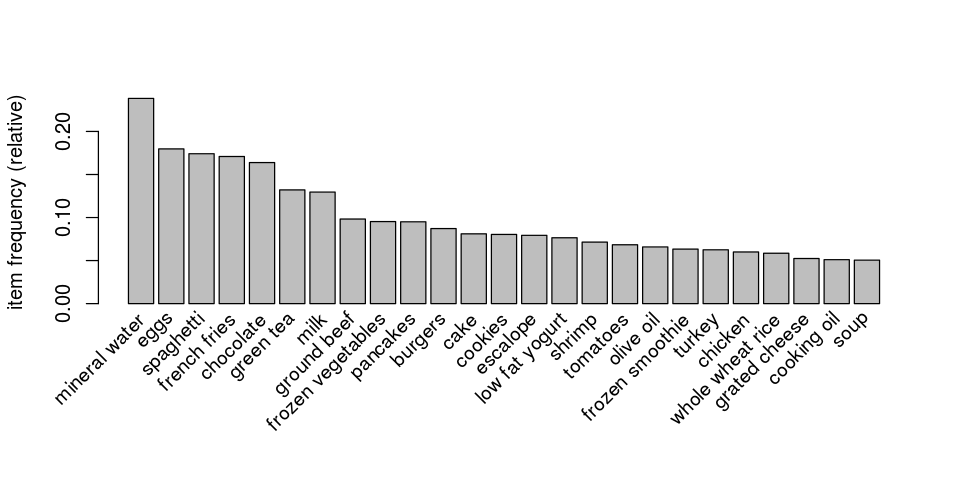

In [11]:
itemFrequencyPlot(df,topN=25)

# Finding the rules

In [13]:
min_buys_per_day=3
min_support=min_buys_per_day*7/length(df)
min_support

[1] 0.002799627

In [17]:
rules=apriori(data=df,parameter=list(support=0.003,confidence=0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.003      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [18]:
rules=apriori(data=df,parameter=list(support=0.003,confidence=0.4))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5   0.003      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [281 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [33]:
inspect(head(sort(rules,by="lift"),10))

     lhs                                            rhs                
[1]  {mineral water,whole wheat pasta}           => {olive oil}        
[2]  {spaghetti,tomato sauce}                    => {ground beef}      
[3]  {french fries,herb & pepper}                => {ground beef}      
[4]  {cereals,spaghetti}                         => {ground beef}      
[5]  {frozen vegetables,mineral water,soup}      => {milk}             
[6]  {chocolate,herb & pepper}                   => {ground beef}      
[7]  {chocolate,mineral water,shrimp}            => {frozen vegetables}
[8]  {frozen vegetables,mineral water,olive oil} => {milk}             
[9]  {cereals,ground beef}                       => {spaghetti}        
[10] {frozen vegetables,soup}                    => {milk}             
     support     confidence lift    
[1]  0.003866151 0.4027778  6.115863
[2]  0.003066258 0.4893617  4.980600
[3]  0.003199573 0.4615385  4.697422
[4]  0.003066258 0.4600000  4.681764
[5]  0.003066258 0.6052

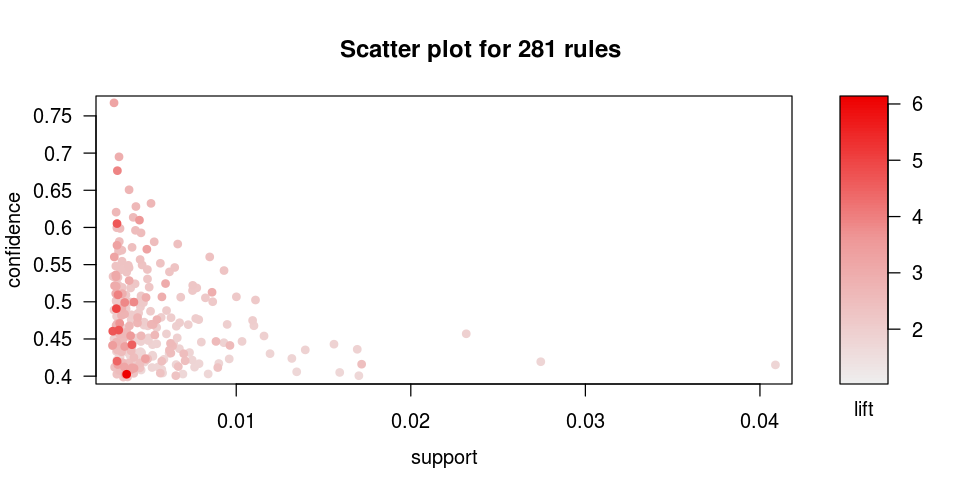

In [26]:
plot(rules)

In [34]:
rules=apriori(data=df,parameter=list(support=0.003,confidence=0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.003      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [1348 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [35]:
inspect(head(sort(rules,by="lift"),10))

     lhs                                       rhs             support    
[1]  {mineral water,whole wheat pasta}      => {olive oil}     0.003866151
[2]  {frozen vegetables,milk,mineral water} => {soup}          0.003066258
[3]  {fromage blanc}                        => {honey}         0.003332889
[4]  {spaghetti,tomato sauce}               => {ground beef}   0.003066258
[5]  {light cream}                          => {chicken}       0.004532729
[6]  {pasta}                                => {escalope}      0.005865885
[7]  {french fries,herb & pepper}           => {ground beef}   0.003199573
[8]  {cereals,spaghetti}                    => {ground beef}   0.003066258
[9]  {frozen vegetables,mineral water,soup} => {milk}          0.003066258
[10] {french fries,ground beef}             => {herb & pepper} 0.003199573
     confidence lift    
[1]  0.4027778  6.115863
[2]  0.2771084  5.484407
[3]  0.2450980  5.164271
[4]  0.4893617  4.980600
[5]  0.2905983  4.843951
[6]  0.3728814  4.700812


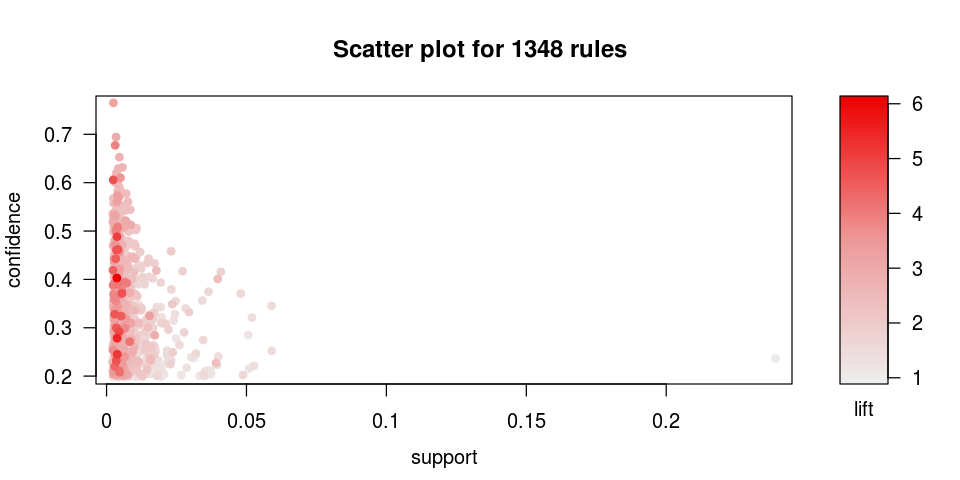

In [36]:
plot(rules)

In [37]:
rules=apriori(data=df,parameter=list(support=0.004,confidence=0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.004      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [114 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [811 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [38]:
inspect(head(sort(rules,by="lift"),10))

     lhs                       rhs                 support confidence     lift
[1]  {light cream}          => {chicken}       0.004532729  0.2905983 4.843951
[2]  {pasta}                => {escalope}      0.005865885  0.3728814 4.700812
[3]  {pasta}                => {shrimp}        0.005065991  0.3220339 4.506672
[4]  {eggs,                                                                   
      ground beef}          => {herb & pepper} 0.004132782  0.2066667 4.178455
[5]  {whole wheat pasta}    => {olive oil}     0.007998933  0.2714932 4.122410
[6]  {herb & pepper,                                                          
      spaghetti}            => {ground beef}   0.006399147  0.3934426 4.004360
[7]  {herb & pepper,                                                          
      mineral water}        => {ground beef}   0.006665778  0.3906250 3.975683
[8]  {tomato sauce}         => {ground beef}   0.005332622  0.3773585 3.840659
[9]  {mushroom cream sauce} => {escalope}      0.005

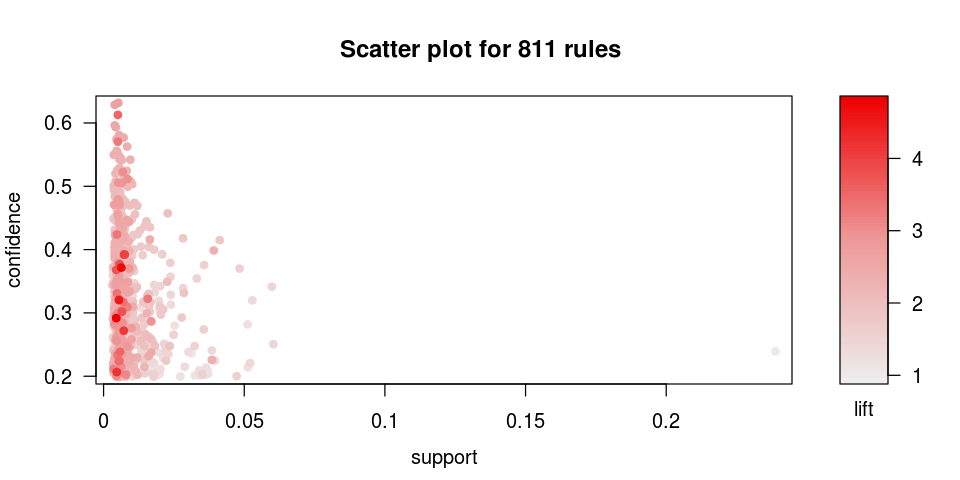

In [39]:
plot(rules)